<a href="https://colab.research.google.com/github/zar373/Loan_Prediction/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loan Prediction using Logistic Regression


##Importing Required Libraries

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


##Importing Data

In [63]:
test = pd.read_csv("/content/sample_data/test_lAUu6dG.csv")
train = pd.read_csv("/content/sample_data/train_ctrUa4K.csv")

test_original = test.copy()
train_original = train.copy()


##Data Exploration

In [64]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [65]:
train["Loan_Amount_Term"].value_counts()


,count
Loan_Amount_Term,
360.0,512
180.0,44
480.0,15
300.0,13
240.0,4
84.0,4
120.0,3
60.0,2
36.0,2


In [61]:
print('The data info is', train.info())

print('The number of columns in training data', train.columns)
print("the null values sum is", train.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
The data info is None
The number of columns in training data Index(['Loan_ID', 'Gender', 'Married', 'Dependents'

##Univariate Analysis

###Categorical Data Analysis

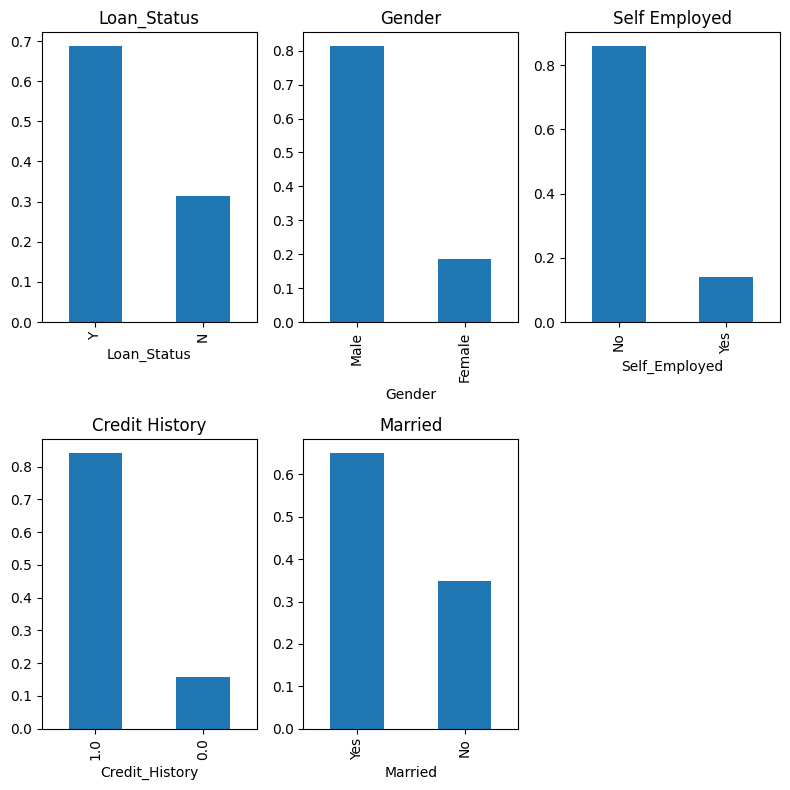

In [66]:
# Categorical variables are: Gender, Married, Sel_Employed, Loan_Status, Credit_Hostory = 5; 2 rows, 3 cols

plt.figure(figsize=(8, 8))

plt.subplot(2,  3, 1)

freq_train = train['Loan_Status'].value_counts(normalize = True).plot.bar(title = 'Loan_Status')
# # 68.7~ 69% accepted loan
# # 31.2~30% rejected loan

plt.subplot(2, 3, 2)
gender_train = train['Gender'].value_counts(normalize = True).plot.bar(title = 'Gender')

plt.subplot(2, 3, 3)
selfemp_train = train['Self_Employed'].value_counts(normalize = True).plot.bar(title = "Self Employed")

plt.subplot(2, 3, 4)
selfemp_train = train['Credit_History'].value_counts(normalize = True).plot.bar(title = "Credit History")

plt.subplot(2, 3, 5)
selfemp_train = train['Married'].value_counts(normalize = True).plot.bar(title = "Married")

plt.tight_layout()
plt.show()

###Ordinal Data Analysis

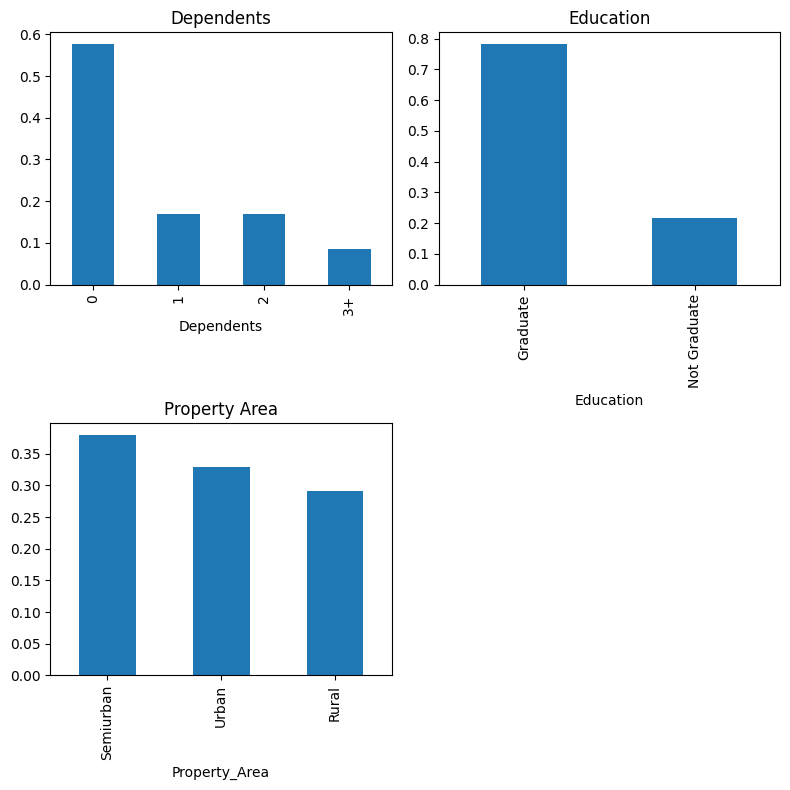

In [67]:
# ordinal data: Dependents, Education, Property Area
plt.figure(figsize=(8,8)) #width= 10, height= 2
plt.subplot(2, 2,1)
dep_train = train['Dependents'].value_counts(normalize= True).plot.bar(title = 'Dependents')

plt.subplot(2,2,2)
edu_train = train['Education'].value_counts(normalize= True).plot.bar(title= 'Education')

plt.subplot(2,2,3)
prop_train = train['Property_Area'].value_counts(normalize= True).plot.bar(title= 'Property Area')

plt.tight_layout()
plt.show()

###Numerical Data Analysis

<Figure size 400x800 with 0 Axes>

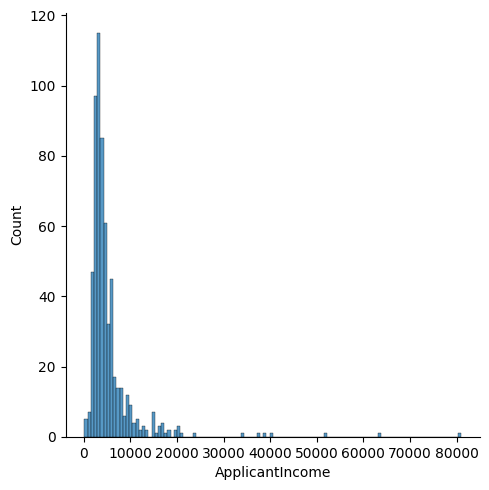

In [68]:
# numerical data

plt.figure(figsize= (4, 8)) #width = 4, height= 8

# plt.subplot(221)
sns.displot(train['ApplicantIncome'])
plt.show()
# left skewed data
# therefore, confirms the presence of outliners/extremes.
# ml algorithm works better for normally distributed data


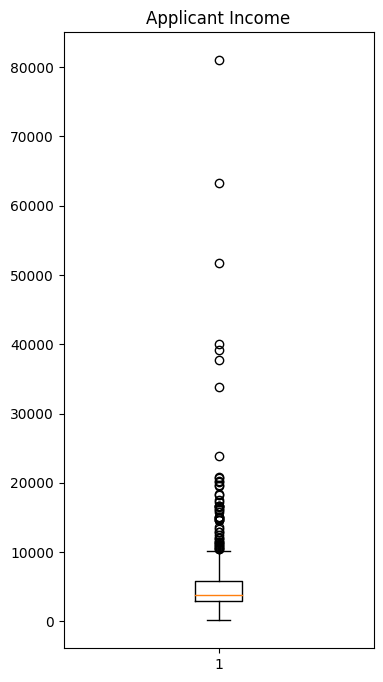

In [69]:
plt.figure(figsize= (4, 8))
plt.boxplot(train['ApplicantIncome'])
plt.title('Applicant Income')
plt.show()

<Figure size 400x800 with 0 Axes>

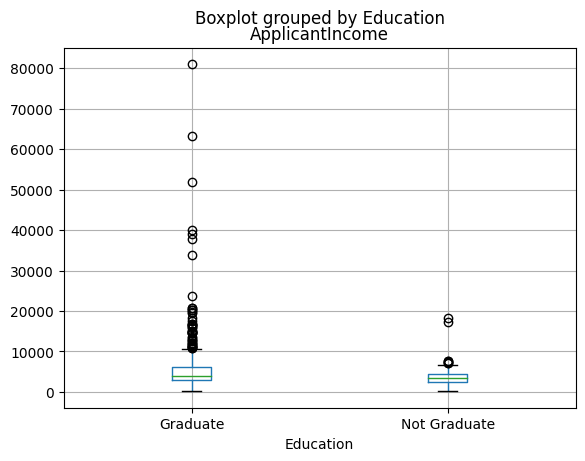

In [70]:
# using pandas for plotting
plt.figure(figsize=(4, 8))
train.boxplot(column= "ApplicantIncome", by='Education')
# plt.title("Applicant Income segregated by Education")
plt.show()

<Figure size 400x800 with 0 Axes>

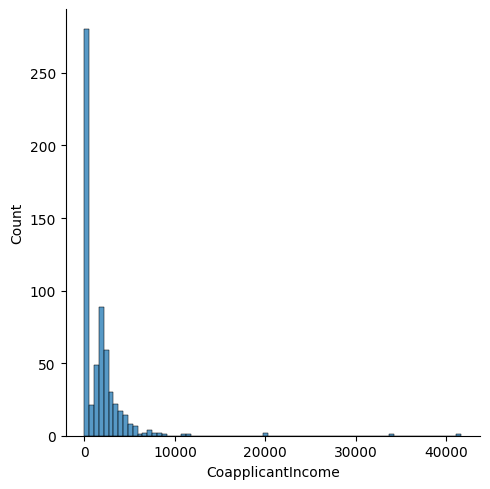

In [71]:
plt.figure(figsize= (4, 8)) #width = 4, height= 8

# plt.subplot(221)
sns.displot(train['CoapplicantIncome'])
plt.show()
# # left skewed data
# therefore, confirms the presence of outliners/extremes.
# ml algorithm works better for normally distributed data

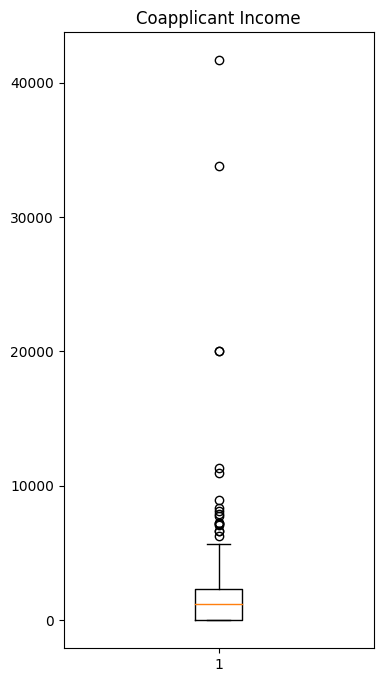

In [72]:
plt.figure(figsize= (4, 8))
plt.boxplot(train['CoapplicantIncome'])
plt.title('Coapplicant Income')
plt.show()

<Figure size 400x800 with 0 Axes>

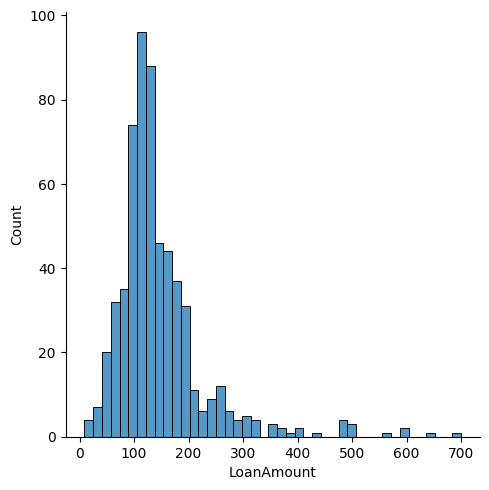

In [73]:
plt.figure(figsize= (4, 8)) #width = 4, height= 8

# plt.subplot(221)
sns.displot(train['LoanAmount'])
plt.show()

##Categorical Data vs Targeted Variable

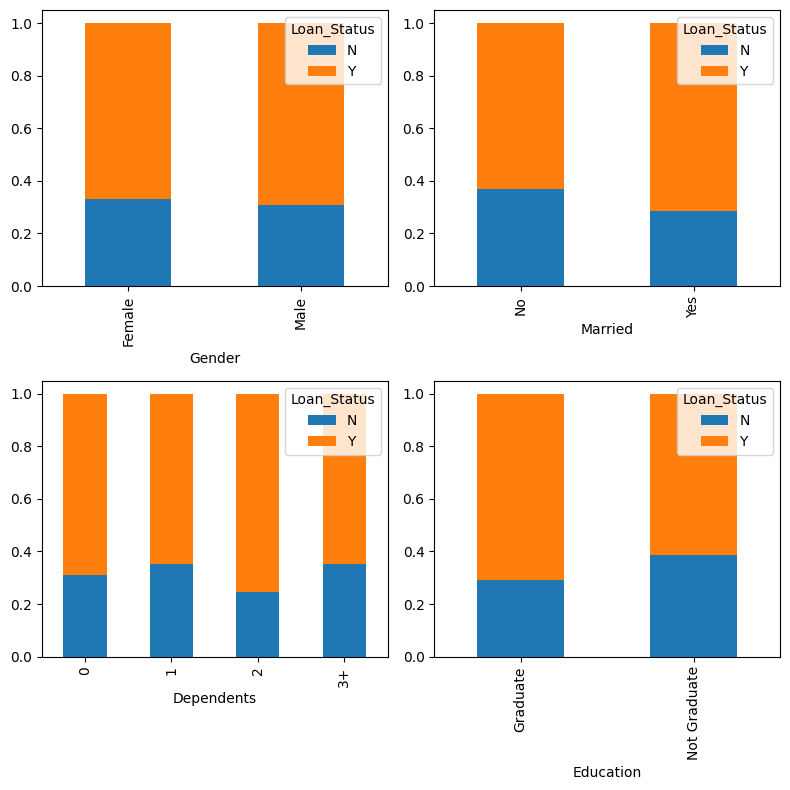

In [74]:
# Categorial Data vs Targeted Variable
# using crosstab which is cross-tabulation shows distribution/ frequency across 2 categorial variables
# plt.figure(figsize=(8, 12))
# not the  y-axis range (minimum and maximum values) would be the same for all subplots.
# initialising subplots
fig, axes = plt.subplots(nrows=2, ncols=2, sharey= False, figsize=(8, 8))
fig.subplots_adjust(hspace= 0.5)

gender_loan = pd.crosstab(train['Gender'], train["Loan_Status"])
gender_loan.div(gender_loan.sum(1).astype('float'), axis=0).plot(kind= "bar", stacked= True, ax=axes[0, 0])

# gender_loan.plot(kind= "bar", stacked= True)
# plt.show()
married_loan = pd.crosstab(train['Married'], train["Loan_Status"])
married_loan.div(married_loan.sum(1).astype('float'), axis=0).plot(kind= "bar", stacked= True, ax=axes[0, 1])


dependent_loan = pd.crosstab(train['Dependents'], train["Loan_Status"])
dependent_loan.div(dependent_loan.sum(1).astype('float'), axis=0).plot(kind= "bar", stacked= True, ax=axes[1, 0])

edu_loan = pd.crosstab(train['Education'], train["Loan_Status"])
edu_loan.div(edu_loan.sum(1).astype('float'), axis=0).plot(kind= "bar", stacked= True, ax=axes[1, 1])
plt.tight_layout()
plt.show()


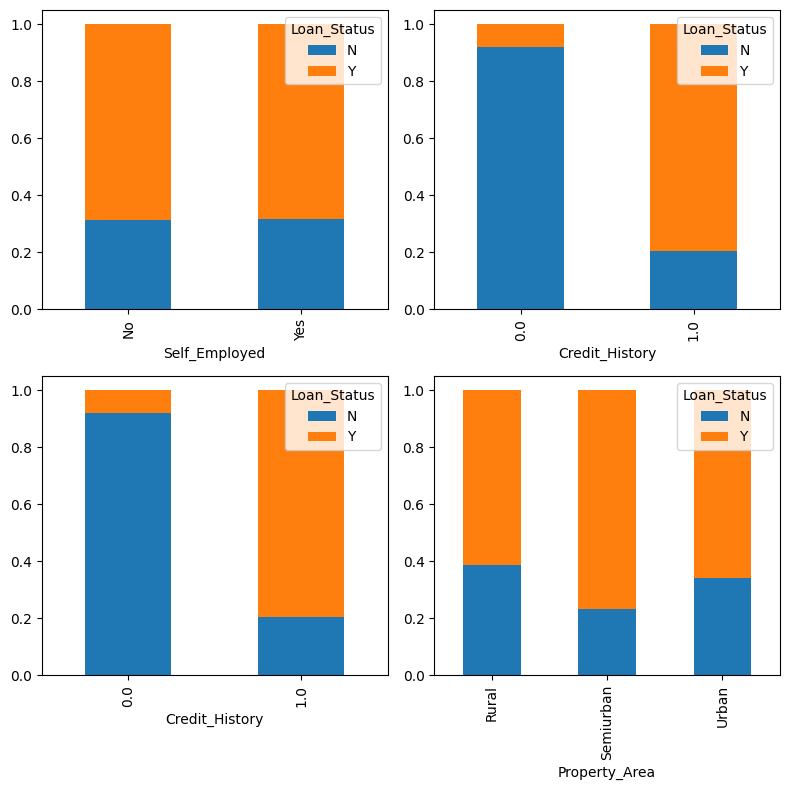

In [75]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharey= False, figsize=(8, 8))
fig.subplots_adjust(hspace= 0.5)
# plt.figure(figsize= (4, 4))
# # Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
#        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
#        'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
#       dtype='object')

selfemp_loan = pd.crosstab(train['Self_Employed'], train["Loan_Status"])
selfemp_loan.div(selfemp_loan.sum(1).astype('float'), axis=0).plot(kind= "bar", stacked= True, ax= axes[0,0])
# # we can't use this

ch_loan = pd.crosstab(train['Credit_History'], train["Loan_Status"])
ch_loan.div(ch_loan.sum(1).astype(float), axis=0).plot(kind= "bar", stacked= True, ax=axes[0, 1])

ch_loan = pd.crosstab(train['Credit_History'], train["Loan_Status"])
ch_loan.div(ch_loan.sum(1).astype(float), axis=0).plot(kind= "bar", stacked= True, ax=axes[1, 0])

pa_loan = pd.crosstab(train['Property_Area'], train["Loan_Status"])
pa_loan.div(pa_loan.sum(1).astype(float), axis=0).plot(kind= "bar", stacked= True, ax= axes[1, 1])

plt.tight_layout()
plt.show()

##Numerical data vs Targeted data

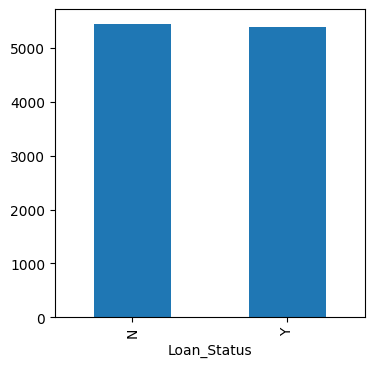

In [76]:
# Numerical data verus Targeted data
plt.figure(figsize= (4, 4))
api = train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()
plt.show()
# this doesn't show any valueable result so we will use bins and distribute over data among the bins.

<Figure size 400x400 with 0 Axes>

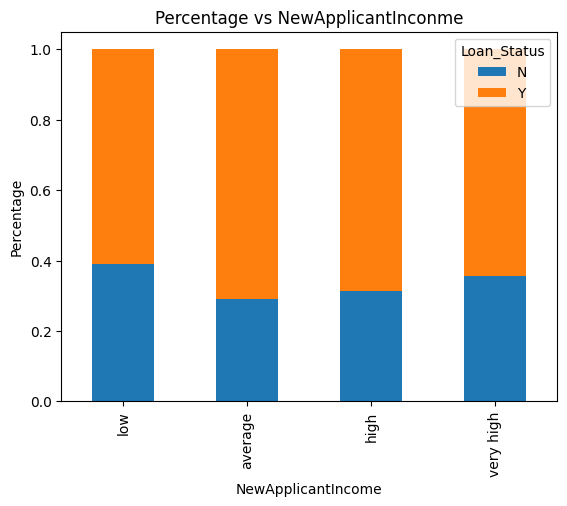

In [77]:
plt.figure(figsize= (4, 4))
bins=[0, 2000, 4000, 6000, 8100]
group = ['low', 'average', 'high', 'very high']
train['NewApplicantIncome'] = pd.cut(train['ApplicantIncome'], bins, labels= group)
# pd.cut recategorises the data among different bins
nap = pd.crosstab(train['NewApplicantIncome'], train['Loan_Status'])
nap.div(nap.sum(1).astype(float), axis= 0).plot(kind= 'bar', stacked= True)
plt.ylabel('Percentage')
plt.title('Percentage vs NewApplicantInconme')
plt.show()


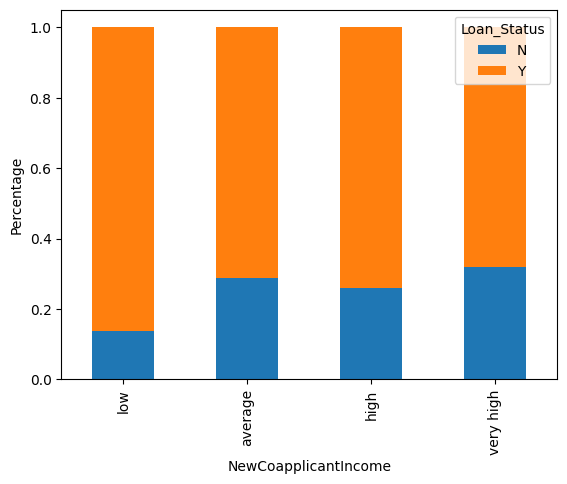

In [78]:
bins = [0, 1000, 2000, 3000, 4200]
groups= ['low', 'average', 'high', 'very high']
train['NewCoapplicantIncome'] = pd.cut(train['CoapplicantIncome'], bins, labels= groups)
ncai = pd.crosstab(train['NewCoapplicantIncome'], train['Loan_Status'])
ncai.div(ncai.sum(1).astype('float'), axis = 0).plot(kind= 'bar', stacked= True)
plt.ylabel("Percentage")
plt.show()
# since many coapplicantincome is nearly 0
#  therefore we have to make new variable: total income


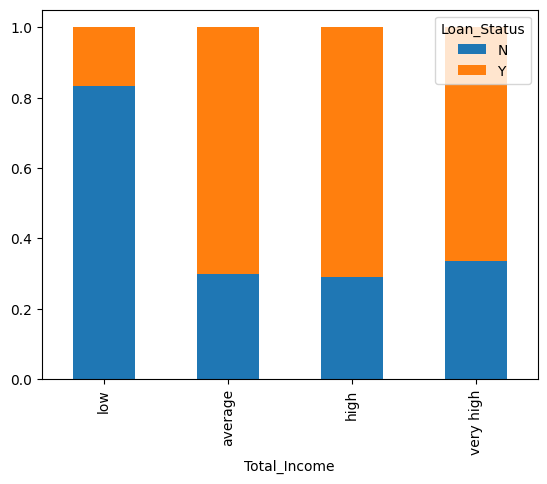

In [79]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']
bins= [0, 2000, 4000, 6000, 8100]
groups= ['low', 'average', 'high', 'very high']
train['Total_Income'] = pd.cut(train['Total_Income'], bins, labels= groups)
ti_loan= pd.crosstab(train['Total_Income'], train['Loan_Status'])
ti_loan.div(ti_loan.sum(1).astype(float), axis= 0).plot(kind= 'bar', stacked= True)
plt.show()


##Categorizing Loan Amount Column Data

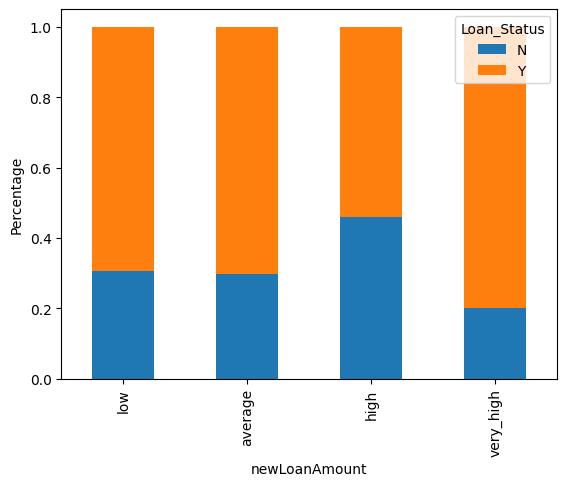

In [80]:

bins= [0, 100,300, 500, 700]
groups= ['low', 'average', 'high', 'very_high']
train['newLoanAmount'] = pd.cut(train['LoanAmount'], bins, labels= groups)
nla_loan= pd.crosstab(train['newLoanAmount'], train['Loan_Status'])
nla_loan.div(nla_loan.sum(1).astype(float), axis= 0).plot(kind= 'bar', stacked= True)
plt.ylabel('Percentage')
plt.show()
# Below results shows that the loan approved is greater for the people falls in low and average category. fulfills our hypothesis that the loan amount approved is high when loan amount is higher.

In [81]:
# we are dropping off unusable columns. bin columns
train = train.drop(['NewApplicantIncome', 'NewCoapplicantIncome', 'newLoanAmount', 'Loan_ID', 'Total_Income'],  axis= 1)
# replacing 3+ with 3 for simiplicity
# Changing loan status too for it follows logistic regression
train['Dependents'].replace('3+', 3, inplace= True)
test['Dependents'].replace('3+', 3, inplace= True)
train["Loan_Status"].replace('N', 0, inplace= True)
train["Loan_Status"].replace('Y', 1, inplace= True)

In [82]:
train['Property_Area']= train['Property_Area'].astype('category')
train['Gender']= train['Gender'].astype('category')
train['Married']= train['Married'].astype('category')
train['Dependents']= train['Dependents'].astype('category')
train['Education']= train['Education'].astype('category')
train['Self_Employed']= train['Self_Employed'].astype('category')

In [83]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Gender             601 non-null    category
 1   Married            611 non-null    category
 2   Dependents         599 non-null    category
 3   Education          614 non-null    category
 4   Self_Employed      582 non-null    category
 5   ApplicantIncome    614 non-null    int64   
 6   CoapplicantIncome  614 non-null    float64 
 7   LoanAmount         592 non-null    float64 
 8   Loan_Amount_Term   600 non-null    float64 
 9   Credit_History     564 non-null    float64 
 10  Property_Area      614 non-null    category
 11  Loan_Status        614 non-null    int64   
dtypes: category(6), float64(4), int64(2)
memory usage: 33.3 KB


##Generating Co-relation Matrix

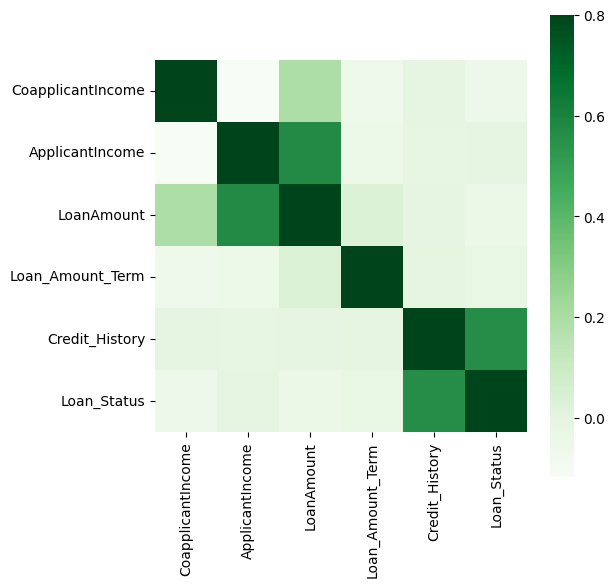

In [84]:
plt.figure(figsize=(6, 6))
train1= train[['CoapplicantIncome', 'ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term','Credit_History','Loan_Status'  ]]
sns.heatmap(train1.corr(), vmax= 0.8, square= True, cmap='Greens')
plt.show()

# square=True: This parameter ensures that the heatmap is displayed as a square (i.e., the aspect ratio is equal). vmax=1.0: This parameter sets the maximum value for the color scale in the heatmap.

# most correaltion is found in between ApplicantIncome, LoanAmount and Credit_History, Loan_Status

##Filling Out Missing Values

In [85]:
print(train.isnull().sum())
train["Gender"].fillna(train['Gender'].mode()[0], inplace= True)
# inplace=True ensures that the changes are applied directly to the original DataFrame.  The .mode()[0] part finds the mode (most frequent value) in the "Gender" column.
train["Dependents"].fillna(train['Dependents'].mode()[0], inplace= True)
train["Self_Employed"].fillna(train['Self_Employed'].mode()[0], inplace= True)
train["Married"].fillna(train['Married'].mode()[0], inplace= True)
train["Credit_History"].fillna(train['Credit_History'].mode()[0], inplace= True)

train["Loan_Amount_Term"].fillna(train['Loan_Amount_Term'].mode()[0], inplace= True)

train["LoanAmount"].fillna(train["LoanAmount"].median(), inplace= True)


Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [86]:
print(train.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [87]:
test["Gender"].fillna(test['Gender'].mode()[0], inplace= True)
test["Dependents"].fillna(test['Dependents'].mode()[0], inplace= True)
test["Self_Employed"].fillna(test['Self_Employed'].mode()[0], inplace= True)
test["Married"].fillna(test['Married'].mode()[0], inplace= True)
test["Credit_History"].fillna(test['Credit_History'].mode()[0], inplace= True)

test["Loan_Amount_Term"].fillna(test['Loan_Amount_Term'].mode()[0], inplace= True)

test["LoanAmount"].fillna(test["LoanAmount"].median(), inplace= True)

print(test.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


##Using Log Transformation for 'LoanAmount' Column

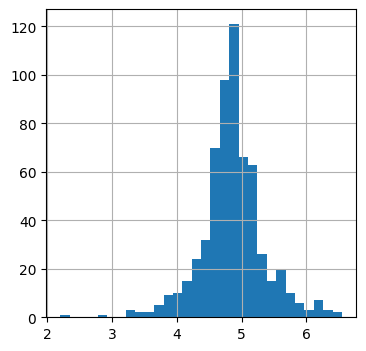

In [88]:
# one way to get rid of outliers is to used log transforrmation, which don't effect the smaller values but reduces the larger values.
import numpy as np
plt.figure(figsize=(4, 4))
train['logLoanAmount'] = np.log(train['LoanAmount'])
test['logLoanAmount'] = np.log(test['LoanAmount'])
train['logLoanAmount'].hist(bins= 30)
plt.show()
# now our distribution is close ti the normal distribution. the process of modeling is incomplete without accuracy check, cal the distance between orignal and predicted value, less distance, more accuracy, more distance, less accuracy



In [89]:
test= test.drop('Loan_ID', axis= 1)
X= train.drop('Loan_Status', axis= 1)
y= train.Loan_Status

X= pd.get_dummies(X)
train= pd.get_dummies(train)
test= pd.get_dummies(test)


##Logistic Regression

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)

In [91]:
"""
Following is the documentation of the model:
C= 1.0; Controls regularization strength (inverse of regularization); lower values mean stronger regularization.
class_weight=None: All classes are treated equally.
dual=False: Solves the primal problem, which is usually preferred when the number of features is greater than the number of samples.
fit_intercept=True: Addition of bias.
intercept_scaling=1: Only useful when fit_intercept=True and using a solver that requires scaling.
max_iter=100: Limits the number of iterations for the solver to converge.
multi_class="ovr": one vs rest.
n_jobs=1: Uses one CPU core for computation.
penalty='l2'; l2 type regularization.
random_state=1: Sets the seed for random number generation to ensure reproducibility.
solver='liblinear': The algorithm used to optimize the logistic regression model.
tol=0.0001: Tolerance for stopping criteria; determines when the solver stops iterating.
verbose=0: No output during fitting; quiet mode.
warm_start=False: Starts from scratch each time, not using previous solutions.
"""
model= LogisticRegression(C= 1.0, class_weight= None, dual= False, fit_intercept= True, intercept_scaling= 1, max_iter= 100, multi_class= "ovr",
                  n_jobs= 1, penalty= 'l2', random_state=1, solver='liblinear', tol= 0.0001, verbose=0, warm_start= False)



In [92]:
model.fit(X_train, y_train)
y_pred= model.predict(X_test)

###Accuracy Check

In [93]:
print("The accuracy score is "+ str(round(metrics.accuracy_score(y_test, y_pred)* 100, 2))+ "%")

The accuracy score is 78.92%


###Confusion Matrix

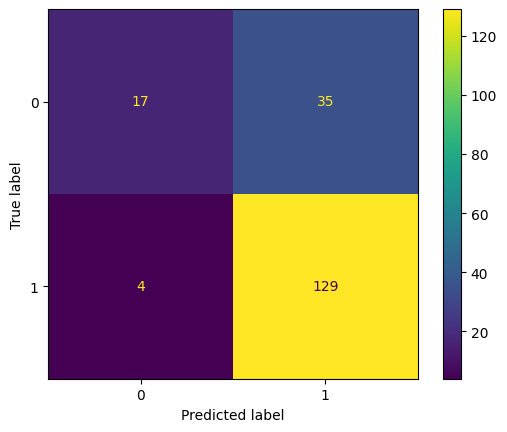

In [94]:
con_max= metrics.confusion_matrix(y_test, y_pred)
cm_display= metrics.ConfusionMatrixDisplay(confusion_matrix= con_max, display_labels= [0,1])
cm_display.plot()
plt.show()

###Predictions on Test Dataset

In [95]:
X_train.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'logLoanAmount', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_3',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [96]:
test.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'logLoanAmount', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_3',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [97]:
pred_test= model.predict(test)

##Logistic Regression Using Stratified K-Folds Cross Validation

In [98]:
from sklearn.model_selection import StratifiedKFold

In [99]:
i= 1
kf= StratifiedKFold(n_splits= 5, random_state= 1, shuffle= True)
for train_index, test_index in kf.split(X, y):
  print('\n{} of kfold {}'.format(i, kf.n_splits))
  xtr, xvl= X.loc[train_index], X.loc[test_index]
  ytr, yvl= y[train_index], y[test_index]
  model= LogisticRegression(random_state=1, max_iter= 200)
  model.fit(xtr, ytr)
  pred_test= model.predict(xvl)
  score= metrics.accuracy_score(yvl, pred_test)
  print('accuracy score', score)
  i +=1
  pred_test= model.predict(test)
  pred= model.predict_proba(xvl)[:, 1]





1 of kfold 5
accuracy score 0.7967479674796748

2 of kfold 5
accuracy score 0.8373983739837398

3 of kfold 5
accuracy score 0.7804878048780488

4 of kfold 5
accuracy score 0.7886178861788617

5 of kfold 5
accuracy score 0.7950819672131147


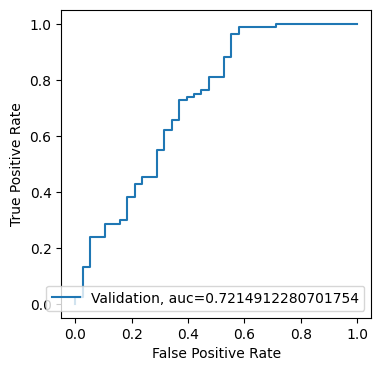

In [100]:
fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc= metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, label= "Validation, auc=" + str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc= 4)
plt.show()


##Feature Engineering

###Total Income

<Figure size 400x400 with 0 Axes>

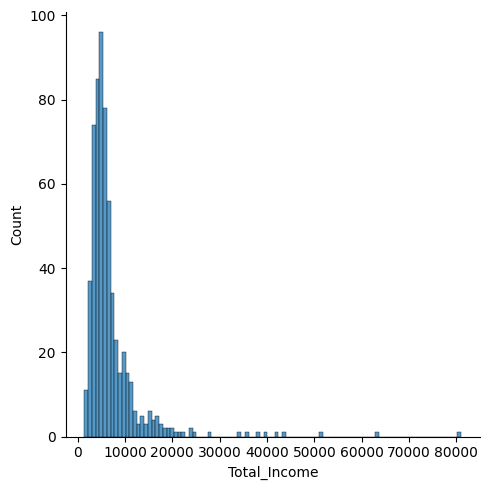

In [101]:
train["Total_Income"] = train["ApplicantIncome"] + train["CoapplicantIncome"]
test["Total_Income"] = test["ApplicantIncome"] + test["CoapplicantIncome"]

plt.figure(figsize= (4, 4))
sns.displot(train["Total_Income"])
plt.show()

<Figure size 400x400 with 0 Axes>

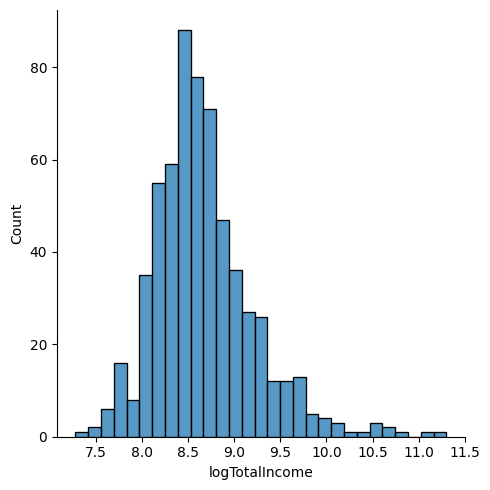

In [102]:
train["logTotalIncome"] = np.log(train["Total_Income"])
test["logTotalIncome"]= np.log(test["Total_Income"])

plt.figure(figsize= (4,4))
sns.displot(train["logTotalIncome"])
plt.show()

###EMI
Ratio of Loan Amount to Loan Amount Term

<Figure size 400x400 with 0 Axes>

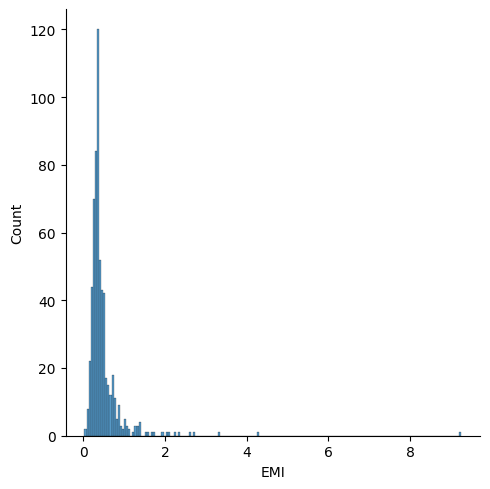

In [103]:
train['EMI']= train["LoanAmount"]/train["Loan_Amount_Term"]
test['EMI']= test["LoanAmount"]/test["Loan_Amount_Term"]

plt.figure(figsize= (4, 4))
sns.displot(train["EMI"])
plt.show()

###Balance Income
Income left after paying EMI

<Figure size 400x400 with 0 Axes>

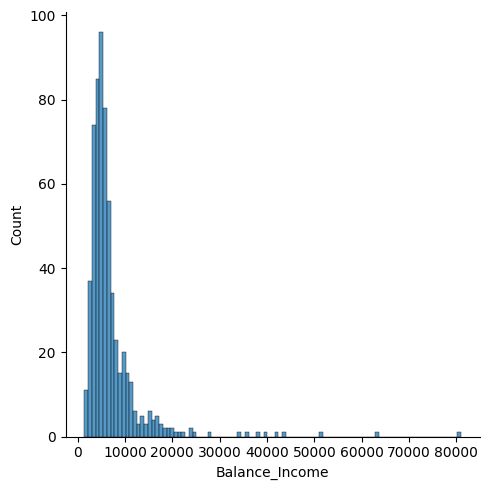

In [104]:
train["Balance_Income"]= train["Total_Income"] - train["EMI"]
test["Balance_Income"]= test["Total_Income"] - test["EMI"]

plt.figure(figsize= (4, 4))
sns.displot(train["Balance_Income"])
plt.show()


Dropping the columns used to create these new columns.

In [105]:
train= train.drop(["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"], axis= 1)
test= test.drop(["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"], axis= 1)

In [106]:
X= train.drop('Loan_Status', axis= 1)
y

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


##Building Models After Feature Engineering

###Logistic Regression

In [107]:
i= 1
kf= StratifiedKFold(n_splits= 5, random_state=1, shuffle= True)
for train_index, test_index in kf.split(X, y):
  print('\n{}  of kfold{}'.format(i, kf.n_splits))
  xtr, xvl= X.loc[train_index], X.loc[test_index]
  ytr, yvl= y[train_index], y[test_index]

  LogReg= LogisticRegression(random_state=1, max_iter= 200)
  LogReg.fit(xtr, ytr)
  pred_test= LogReg.predict(xvl)
  score= metrics.accuracy_score(yvl, pred_test)
  print('accuracy score', score)
  i +=1
  pred_test= LogReg.predict(test)




1  of kfold5
accuracy score 0.7967479674796748

2  of kfold5
accuracy score 0.8373983739837398

3  of kfold5
accuracy score 0.6666666666666666

4  of kfold5
accuracy score 0.7804878048780488

5  of kfold5
accuracy score 0.7950819672131147


###Decision Tree

In [108]:
from sklearn import tree

i= 1
kf= StratifiedKFold(n_splits= 5, random_state= 1, shuffle= True)
for train_index, test_index in kf.split(X, y):
  print("\n{} of fold {}".format(i, kf.n_splits))
  xtr, xvl= X.loc[train_index], X.loc[test_index]
  ytr, yvl= y[train_index], y[test_index]

  DecTre= tree.DecisionTreeClassifier(random_state= 1)
  DecTre.fit(xtr, ytr)
  pred_test= DecTre.predict(xvl)
  score= metrics.accuracy_score(yvl, pred_test)
  print('accuracy score', score)
  i +=1
  pred_test= DecTre.predict(test)



1 of fold 5
accuracy score 0.7723577235772358

2 of fold 5
accuracy score 0.7235772357723578

3 of fold 5
accuracy score 0.7073170731707317

4 of fold 5
accuracy score 0.7235772357723578

5 of fold 5
accuracy score 0.6721311475409836


#GUI Using Streamlit

In [109]:
import joblib


In [116]:
#Saving models
joblib.dump(DecTre, "DecTre.joblib")

['DecTre.joblib']

In [117]:
joblib.dump(LogReg, "LogReg.joblib")

['LogReg.joblib']